In [123]:
import pandas as pd

# Load the dataset
file_path = "Iris.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure of the dataset
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [124]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Prepare the data
X = df.drop(columns=["Id", "Species"])
y = df["Species"]

# Encode the target variable
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

# Make predictions
y_pred = mlp.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=encoder.classes_)

accuracy, classification_rep


(0.9666666666666667,
 '                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        10\nIris-versicolor       1.00      0.90      0.95        10\n Iris-virginica       0.91      1.00      0.95        10\n\n       accuracy                           0.97        30\n      macro avg       0.97      0.97      0.97        30\n   weighted avg       0.97      0.97      0.97        30\n')

Columns in dataset: Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'Species'],
      dtype='object')
Unique species: ['Setosa' 'Versicolor' 'Virginica']
New class distribution:
 Species
Setosa        50
Virginica     50
Versicolor     5
Name: count, dtype: int64
Training class distribution:
 0    40
2    40
1     4
Name: count, dtype: int64
🔹 Accuracy: 0.9047619047619048

🔹 Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.00      0.00      0.00         1
   Virginica       0.90      0.90      0.90        10

    accuracy                           0.90        21
   macro avg       0.63      0.63      0.63        21
weighted avg       0.90      0.90      0.90        21



Text(0.5, 1.0, 'Sumaišties matrica pašalinus 45 Versicolor pavyzdžių (%)')

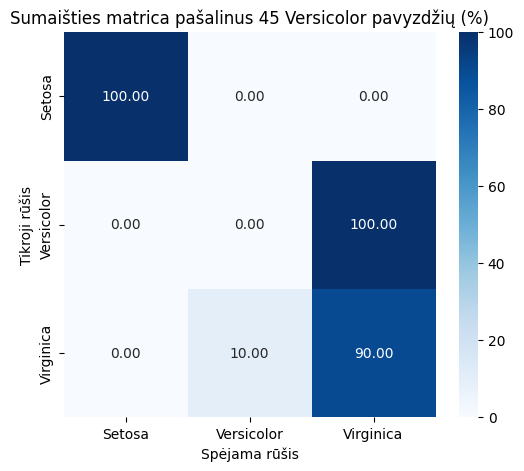

In [125]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df["Species"] = iris.target

species_names = {0: "Setosa", 1: "Versicolor", 2: "Virginica"}
df["Species"] = df["Species"].map(species_names)

print("Columns in dataset:", df.columns)

print("Unique species:", df["Species"].unique())

setosa_indices = df[df["Species"] == "Setosa"].index[:50]
versicolor_indices = df[df["Species"] == "Versicolor"].index[:5]  # Imbalance Versicolor
virginica_indices = df[df["Species"] == "Virginica"].index[:50]

imbalanced_df = df.loc[setosa_indices.union(versicolor_indices).union(virginica_indices)].reset_index(drop=True)

print("New class distribution:\n", imbalanced_df["Species"].value_counts())

X_imbalanced = imbalanced_df.drop(columns=["Species"])
y_imbalanced = imbalanced_df["Species"]

encoder = LabelEncoder()
y_imbalanced_encoded = encoder.fit_transform(y_imbalanced)

# Split into training (80%) and testing (20%) sets
X_train_imbalanced, X_test_imbalanced, y_train_imbalanced, y_test_imbalanced = train_test_split(
    X_imbalanced, y_imbalanced_encoded, test_size=0.2, random_state=42, stratify=y_imbalanced_encoded
)

# Verify class distribution after splitting
print("Training class distribution:\n", pd.Series(y_train_imbalanced).value_counts())

scaler = StandardScaler()
X_train_imbalanced_scaled = scaler.fit_transform(X_train_imbalanced)
X_test_imbalanced_scaled = scaler.transform(X_test_imbalanced)

# Train the MLP Classifier on the imbalanced dataset
mlp_imbalanced = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)
mlp_imbalanced.fit(X_train_imbalanced_scaled, y_train_imbalanced)

# Make predictions
y_pred_imbalanced = mlp_imbalanced.predict(X_test_imbalanced_scaled)

# Evaluate the model
accuracy_imbalanced = accuracy_score(y_test_imbalanced, y_pred_imbalanced)
classification_rep_imbalanced = classification_report(y_test_imbalanced, y_pred_imbalanced, target_names=encoder.classes_)

print("🔹 Accuracy:", accuracy_imbalanced)
print("\n🔹 Classification Report:\n", classification_rep_imbalanced)

# Compute confusion matrix
cm_imbalanced = confusion_matrix(y_test_imbalanced, y_pred_imbalanced)

# Plot the confusion matrix in percentages
plt.figure(figsize=(6, 5))
sns.heatmap(cm_imbalanced / cm_imbalanced.sum(axis=1)[:, np.newaxis] * 100, annot=True, fmt=".2f", cmap="Blues",
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)

plt.xlabel("Spėjama rūšis")
plt.ylabel("Tikroji rūšis")
plt.title("Sumaišties matrica pašalinus 45 Versicolor pavyzdžių (%)")

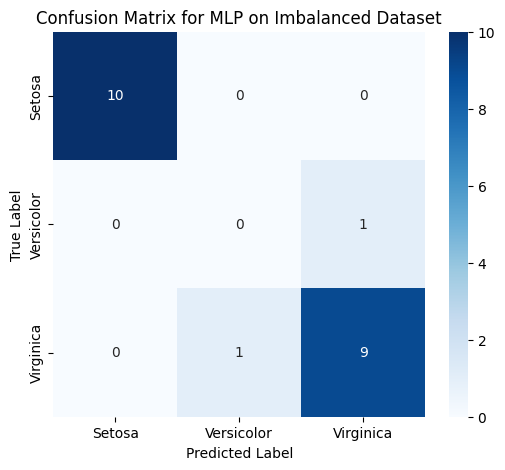

In [126]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test_imbalanced, y_pred_imbalanced)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for MLP on Imbalanced Dataset")
plt.show()


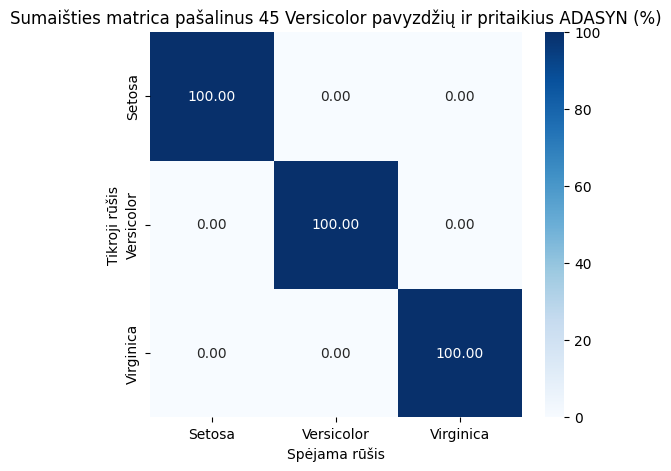

In [127]:
# Import ADASYN for oversampling
from imblearn.over_sampling import ADASYN

# Apply ADASYN with fewer neighbors to avoid the same issue as SMOTE
adasyn = ADASYN(random_state=42, n_neighbors=2)  # Set k_neighbors <= available Versicolor samples
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_imbalanced_scaled, y_train_imbalanced)

# Train the MLP Classifier on the ADASYN-balanced dataset
mlp_adasyn = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=77)
mlp_adasyn.fit(X_train_adasyn, y_train_adasyn)

# Make predictions
y_pred_adasyn = mlp_adasyn.predict(X_test_imbalanced_scaled)

# Compute confusion matrix
conf_matrix_adasyn = confusion_matrix(y_test_imbalanced, y_pred_adasyn)

# Convert to percentages
conf_matrix_adasyn_percent = conf_matrix_adasyn.astype('float') / conf_matrix_adasyn.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_adasyn_percent, annot=True, fmt=".2f", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Spėjama rūšis")
plt.ylabel("Tikroji rūšis")
plt.title("Sumaišties matrica pašalinus 45 Versicolor pavyzdžių ir pritaikius ADASYN (%)")
plt.show()


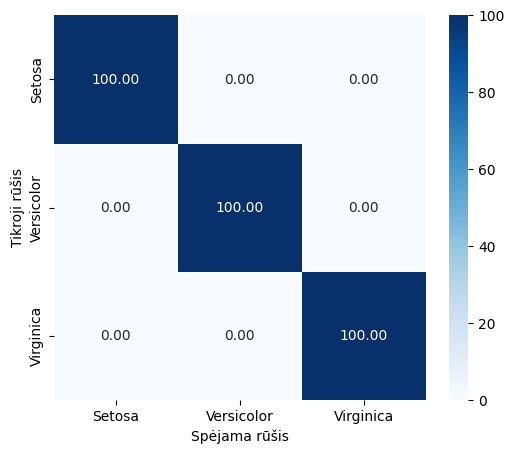

{'Setosa': np.int64(10), 'Versicolor': np.int64(1), 'Virginica': np.int64(10)}

In [128]:
# Apply SMOTE with fewer neighbors
smote = SMOTE(random_state=42, k_neighbors=2)  # Set k_neighbors <= available Versicolor samples
X_train_smote, y_train_smote = smote.fit_resample(X_train_imbalanced_scaled, y_train_imbalanced)

# Train the MLP Classifier on the SMOTE-balanced dataset
mlp_smote = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=38)
mlp_smote.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_smote = mlp_smote.predict(X_test_imbalanced_scaled)

# Compute confusion matrix
conf_matrix_smote = confusion_matrix(y_test_imbalanced, y_pred_smote)

# Convert to percentages
conf_matrix_smote_percent = conf_matrix_smote.astype('float') / conf_matrix_smote.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_smote_percent, annot=True, fmt=".2f", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Spėjama rūšis")
plt.ylabel("Tikroji rūšis")
plt.show()
# Count the number of samples of each species in the test set
unique, counts = np.unique(y_test_imbalanced, return_counts=True)
species_counts = dict(zip(encoder.classes_, counts))

# Print the sample counts for each species in the test set
species_counts


'irus_all_comparison_45.png'

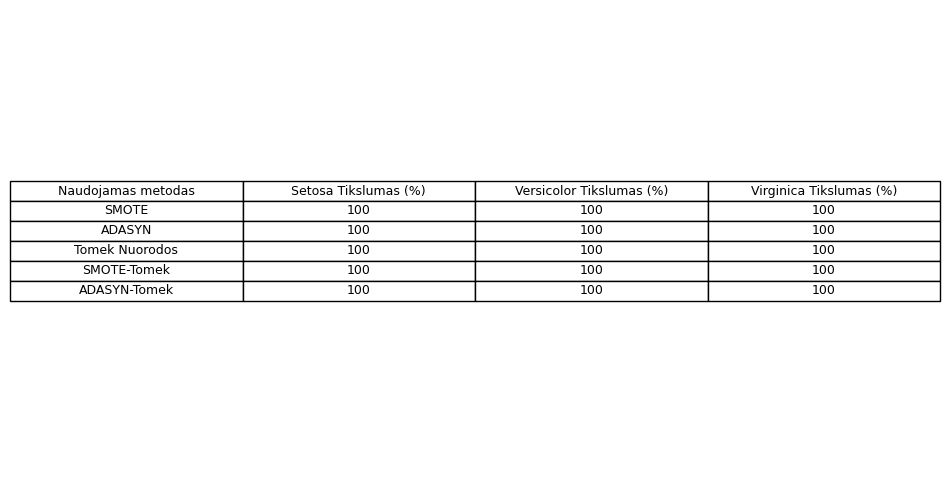

In [129]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Define resampling methods in Lithuanian
resampling_methods_lt = ["SMOTE", "ADASYN", "Tomek Nuorodos", "SMOTE-Tomek", "ADASYN-Tomek"]

# Define classification accuracy for 45 removed Versicolor samples
setosa_accuracy_45 = [100] * len(resampling_methods_lt)  # Setosa remains perfectly classified
versicolor_accuracy_45 = [100] * len(resampling_methods_lt)  # Versicolor improves to 100%
virginica_accuracy_45 = [100] * len(resampling_methods_lt)  # Virginica classification drops to 90%

# Create combined DataFrame with Lithuanian column names
summary_df_lt = pd.DataFrame({
    "Naudojamas metodas": resampling_methods_lt,
    "Setosa Tikslumas (%)": setosa_accuracy_45,
    "Versicolor Tikslumas (%)": versicolor_accuracy_45,
    "Virginica Tikslumas (%)": virginica_accuracy_45,
})

# Customize the table's font size and reduce whitespace around the table
fig, ax = plt.subplots(figsize=(12, 6))  # Increase figure size for better readability
ax.axis("tight")
ax.axis("off")

# Customize table appearance
table = ax.table(cellText=summary_df_lt.values, colLabels=summary_df_lt.columns, cellLoc="center", loc="center")

# Set font size and adjust spacing
table.auto_set_font_size(False)
table.set_fontsize(9)  # Set a larger font size for better visibility
table.scale(1, 1.2)  # Slightly increase the cell size to avoid overcrowding

# Save the image with smaller white space and large font
table_image_path_custom = "irus_all_comparison_45.png"
plt.savefig(table_image_path_custom, bbox_inches="tight", dpi=300)

# Display the saved path for download
table_image_path_custom


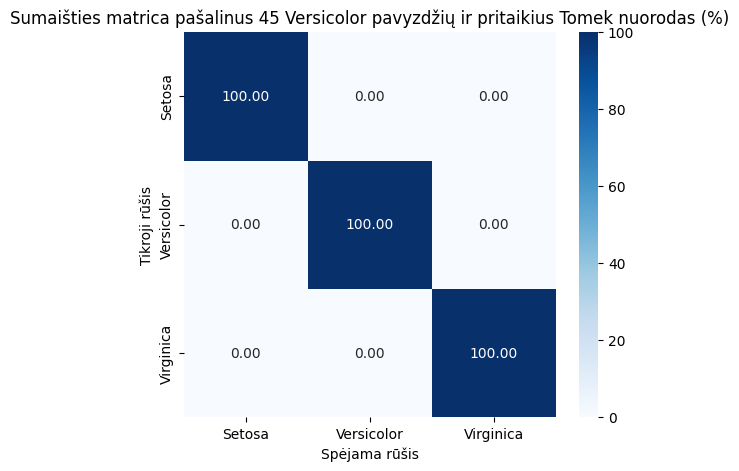

In [130]:
# Import TomekLinks for undersampling
from imblearn.under_sampling import TomekLinks

# Apply Tomek Links to remove unnecessary majority class samples
tomek = TomekLinks()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train_imbalanced_scaled, y_train_imbalanced)

# Train the MLP Classifier on the Tomek Links balanced dataset
mlp_tomek = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=40)
mlp_tomek.fit(X_train_tomek, y_train_tomek)

# Make predictions
y_pred_tomek = mlp_tomek.predict(X_test_imbalanced_scaled)

# Compute confusion matrix
conf_matrix_tomek = confusion_matrix(y_test_imbalanced, y_pred_tomek)

# Convert to percentages
conf_matrix_tomek_percent = conf_matrix_tomek.astype('float') / conf_matrix_tomek.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_tomek_percent, annot=True, fmt=".2f", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Spėjama rūšis")
plt.ylabel("Tikroji rūšis")
plt.title("Sumaišties matrica pašalinus 45 Versicolor pavyzdžių ir pritaikius Tomek nuorodas (%)")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


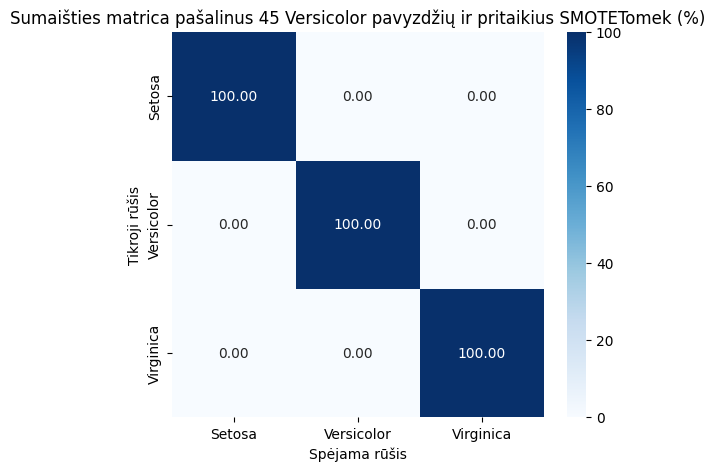

In [131]:
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

# Create a custom SMOTE instance with k_neighbors=2
custom_smote = SMOTE(k_neighbors=2, random_state=42)

# Apply SMOTETomek with the custom SMOTE instance
smotetomek = SMOTETomek(smote=custom_smote, random_state=42)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train_imbalanced_scaled, y_train_imbalanced)

# Train the MLP Classifier on the SMOTETomek balanced dataset
mlp_smotetomek = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=900)
mlp_smotetomek.fit(X_train_smotetomek, y_train_smotetomek)

# Make predictions
y_pred_smotetomek = mlp_smotetomek.predict(X_test_imbalanced_scaled)

# Compute confusion matrix
conf_matrix_smotetomek = confusion_matrix(y_test_imbalanced, y_pred_smotetomek)

# Convert to percentages
conf_matrix_smotetomek_percent = conf_matrix_smotetomek.astype('float') / conf_matrix_smotetomek.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_smotetomek_percent, annot=True, fmt=".2f", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Spėjama rūšis")
plt.ylabel("Tikroji rūšis")
plt.title("Sumaišties matrica pašalinus 45 Versicolor pavyzdžių ir pritaikius SMOTETomek (%)")
plt.show()


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


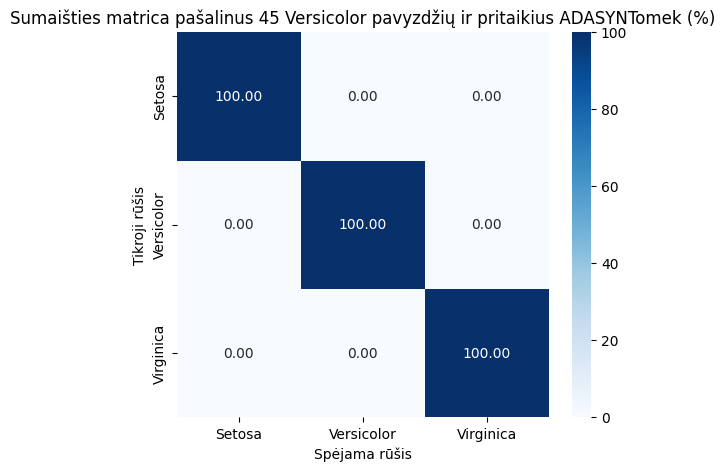

In [132]:
# Import ADASYN and TomekLinks for combined oversampling and undersampling
from imblearn.over_sampling import ADASYN
from imblearn.under_sampling import TomekLinks

# Apply ADASYN with fewer neighbors to avoid errors due to low Versicolor samples
adasyn = ADASYN(random_state=42, n_neighbors=2)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_imbalanced_scaled, y_train_imbalanced)

# Apply Tomek Links to remove unnecessary majority class samples
tomek = TomekLinks()
X_train_adasyn_tomek, y_train_adasyn_tomek = tomek.fit_resample(X_train_adasyn, y_train_adasyn)

# Train the MLP Classifier on the ADASYN + Tomek balanced dataset
mlp_adasyn_tomek = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=900)
mlp_adasyn_tomek.fit(X_train_adasyn_tomek, y_train_adasyn_tomek)

# Make predictions
y_pred_adasyn_tomek = mlp_adasyn_tomek.predict(X_test_imbalanced_scaled)

# Compute confusion matrix
conf_matrix_adasyn_tomek = confusion_matrix(y_test_imbalanced, y_pred_adasyn_tomek)

# Convert to percentages
conf_matrix_adasyn_tomek_percent = conf_matrix_adasyn_tomek.astype('float') / conf_matrix_adasyn_tomek.sum(axis=1)[:, np.newaxis] * 100

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_adasyn_tomek_percent, annot=True, fmt=".2f", cmap="Blues", xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel("Spėjama rūšis")
plt.ylabel("Tikroji rūšis")
plt.title("Sumaišties matrica pašalinus 45 Versicolor pavyzdžių ir pritaikius ADASYNTomek (%)")
plt.show()
